# Unifynd Interview Assessment (Data Analytics)


<br>

---

**Author**: Aarsh Batra
<br>
**E-mail**: aarshbatra.in@gmail.com
<br>
**Mob:** 8800592799
<br>

---

&nbsp;


## Checklist before running

---

* Before running the notebook, please make sure that the following steps are executed. I am certain that you are already well versed with these steps. But, I am still mentioning this for completeness:

<br>

   * Setup a R kernel in Anaconda Navigator (If you already have a R Kernel installed on Anaconda, you can move to the next instruction)
    
      * Open your Anaconda Navigator > Go to Environments tab > Click on Create > Select R > Name the Environment > Click               Create.
        
      * This will add a R Kernel to your Jupyter Notebooks with all the *r-essentials* list of packages installed.
        
<br>        

* Launch Jupyter Notebook in your browser from your Anaconda Navigator and click on **New** and then select **R** from the available list of Kernels. This will create a New Jupyter Notebook with R as its Kernel (you can verify this by checking the top right area of the notebook, where you should see **R**). 

<br>

* Once the Jupyter Notebook, with R as its kernel is launched, **click on File > Open > Open the Jupyter Notebook **unifyndInterviewAssessmentJupyterNotebookAarshBatra.ipynb**. Now, you have my Jupyter Notebook opened with a R Kernel.**

<br>

* Finally, please make sure that you have all the relevant packages installed in your environment that you created in the first step. 

   * Note that in the first step, when you created a R Kernel, it automatically added the **r-essentials** list of                   packages in your environment. 
        
   * In addition to those, you would also need to add a few more packages (that aren't included in the r-essentials list             of packages). The load libraries section cell (see below) lists all the packages that are used by this notebook. Once           you add these packages, you will have all the necessary environment to run my Jupyter notebook smoothly.

   * The additional list of packages (other than the r-essentials list of packages) that you need to install to run this             notebook (if you have already had these installed, please ignore this step) are: **devtools, roxygen2**.

   * To download these packages: Open your Anaconda Navigator  > Go to Environments tab > Select your R environment, then           you will see a list of packages that are already installed (and also the list of those that are not installed).                 Search the above packages in the search bar and download them. 

   * If you'd like to download the packages that aren't available in the Anaconda Navigator GUI, you can do that by                 running the following command: `conda install -c r package-name` from the CMD.exe terminal app that you can launch             from within Anaconda. 

   * Although please note that as per [Anaconda help docs](https://docs.anaconda.com/anaconda/packages/r-language-pkg-               docs/), many Comprehensive R Archive Network (CRAN) packages are available as conda packages, but Anaconda does not             provide builds of the entire CRAN repository, so **there are some packages in CRAN that are not available as conda             packages.** For example, I used `skimr` as one of the packages in my R Notebook solution (in the Exploratory Data               Analysis section), but that package is not yet available as a conda package, so here in this notebook, I have                   replaced skimr, with the R's base library's `summary` function.

<br>

* Once all of the above steps are completed, you are all set to run this Jupyter Notebook.

<br>

* This notebook contains all code, output and answers, for all of the 7 Questions (and all its sub-parts). By that I mean, it     also contain answers to observation questions (ones in which I am asked about my observations and insights, e.g. Q7:part-3).

<br>

* Please note that some cells (e.g. the cell in which I read in data, cells in which table is displayed) might take a few seconds (3-4 seconds) to run. While they are running, the cell number is replaced by (*) and once the process is complete, the cell number comes back. After that, you can proceed to running the next cell.

* Feel free to reach out to me at **aarshbatra.in@gmail.com**/8800592799 if you have any questions or run into any problems. I   will quickly troubleshoot it for you.

&nbsp;

&nbsp;


---


## Initial Setup

---


In [3]:
# metadata---------------------------------------------------------------------
# author: Aarsh Batra
# Start Date: October 07, 2021
# R version: 4.1.1 (2021-08-10)
# nickname: Kick Things
# Platform: x86_64-w64-mingw32 
# arch: x86_64
# Running under: Windows 10 x64 (build 18363)
# R Studio version info: 2021.09.0+351 "Ghost Orchid"
# e-mail: aarshbatra.in@gmail.com

# Global options
options(warn = -1)

In [2]:
# load libraries---------------------------------------------------------------

library(tidyverse)
library(knitr)
library(devtools)
library(stringr)
library(tidyr)
library(dplyr)
# library(skimr)
library(magrittr)
library(data.table)
library(lubridate)
library(roxygen2)
# library(testthat)
library(ggplot2)
library(readr)
library(readxl)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose


Attaching pa

In [4]:
## helper functions------------------------------------------------------------

# converting backward slashes to forward slashes in the path names-------------

#' converting backward slashes to forward slashes in the path names
#'
#' When we construct relative path names in R using functions like
#' \code{normalizePath()}, R outputs path names containing "backslashes", but
#' we require path names containing forward slashes. \code{correct_path} \
#' function takes in a path name with backward slashes and converts it into a
#' path name with forward slashes.
#'
#' @importFrom stringr str_replace_all
#' @param backward_slash_path backward slash path
#' @return \code{forward_slash_path} path with forward slashes
#'
#' @examples
#' correct_path(backward_slash_path = "backward slash path")
#'
#' @export
#'

correct_path <- function(backward_slash_path){
  forward_slash_path <- str_replace_all(backward_slash_path, "\\\\", "/")
  forward_slash_path
}

# end of function

#========

# read .xlsx data files into R-------------------------------------------------

#' reading raw .xlsx data into R
#'
#' This functions reads in raw .xlsx data into R (after performing a few
#' sanity checks) and throws an error if for any reason data cannot be read.
#' Note that this function takes in a file name, not file path. A relative file
#' path is automatically constructed in the function.
#'
#' @importFrom readxl read_xlsx
#' @importFrom base file.exists stop
#' @param file_name name of the .xlsx file
#'
#' @return This function returns an R object which contains the raw dataset.
#'
#' @examples
#' read_raw_xlsx_data(file_name = "couponTransactions.xlsx")
#'
#' @export

read_raw_xlsx_data <- function(file_name){

  # construct relative path_to_file from file name
  path_to_file <- file.path(correct_path(normalizePath(".")), "data-raw",
            file_name)

  # Sanity check 1: stop if file name is NOT of type "character"
  if(!is.character(path_to_file)){
    stop("path_to_file should be of type character")
  }

  # Sanity check 2: stop if file does not exist at the given path
  if(!file.exists(path_to_file)){
    stop("file not present in the specified location. Please make sure
         that you point the path to the raw data .xlsx file.")
  } else {
    raw_data <- readxl::read_xlsx(path_to_file)
    raw_data
  }

}

# end of function

#========



In [5]:
# read in raw .xlsx datasets into R--------------------------------------------

coupon_transactions_raw <- read_raw_xlsx_data("couponTransactions.xlsx")
 
customer_scans_raw <- read_raw_xlsx_data("customerScans.xlsx")

customer_user_raw <- read_raw_xlsx_data("customerUser.xlsx")



&nbsp;

<hr>

## Exploratory Data Analysis

* First, I will explore the dataset after which I will proceed to
answering the questions. Everything inside the below chunk of code is for exploration only. I have commented out most of the exploratory code, if you'd like to see what it does, you may uncomment it. None of the variable from the below chunk exploratory code are used after this chunk of code. Still, I have included some of the main exploratory code output below. 

&nbsp;


In [9]:
# exploring coupon_transaction_raw dataset-------------------------------------

# View(coupon_transactions_raw)

# getting a basic summary
summary(coupon_transactions_raw)

# # number of unique customers
#   length(unique(coupon_transactions_raw$customerId)) # 14979
# 
# # number of unique couponUnlock dates
#   length(unique(coupon_transactions_raw$couponUnlockDate)) # 291
# 
# # number of unique couponId's
# length(unique(coupon_transactions_raw$couponId)) # 328


# exploring customer_scans_raw dataset-----------------------------------------

# View(customer_scans_raw)

    couponId       customerId    couponUnlockDate             
 Min.   :  2.0   Min.   :    9   Min.   :2019-06-05 00:00:00  
 1st Qu.:107.5   1st Qu.: 9310   1st Qu.:2020-01-05 00:00:00  
 Median :122.0   Median :28087   Median :2020-01-18 00:00:00  
 Mean   :151.9   Mean   :25406   Mean   :2020-02-17 08:11:43  
 3rd Qu.:172.0   3rd Qu.:35039   3rd Qu.:2020-02-15 00:00:00  
 Max.   :469.0   Max.   :80851   Max.   :2020-11-12 00:00:00  

In [10]:
# skim customer_scans_raw dataset
summary(customer_scans_raw)

# # max amount for billTotal column
# max(customer_scans_raw$billTotal) # why is this too big? look into this.
# 
# # number of unique customers
# length(unique(customer_scans_raw$customerId))
# 
# # number of unique scan log ids
# length(unique(customer_scans_raw$scanlogId))
# 
# # number of unique stores
# length(unique(customer_scans_raw$storeName))
# 
# # store with the maximum bill total
# customer_scans_raw %>% 
#   filter(billTotal == max(billTotal)) %>%
#   select(storeName)
# 

# exploring customer_user_raw data---------------------------------------------

# View(customer_user_raw)

   scanlogId        image             customerId   
 Min.   :    1   Length:22886       Min.   :    9  
 1st Qu.:14935   Class :character   1st Qu.: 5288  
 Median :26393   Mode  :character   Median :14536  
 Mean   :26849                      Mean   :22356  
 3rd Qu.:39501                      3rd Qu.:34897  
 Max.   :56189                      Max.   :80837  
                                                   
   createdAt                    storeName            billDate                  
 Min.   :2019-06-12 00:00:00   Length:22886       Min.   :1904-12-14 00:00:00  
 1st Qu.:2019-12-26 00:00:00   Class :character   1st Qu.:2019-11-23 00:00:00  
 Median :2020-01-28 00:00:00   Mode  :character   Median :2020-01-18 00:00:00  
 Mean   :2020-02-20 09:05:35                      Mean   :2019-04-18 05:30:39  
 3rd Qu.:2020-03-04 00:00:00                      3rd Qu.:2020-03-03 00:00:00  
 Max.   :2020-11-12 00:00:00                      Max.   :2248-02-19 00:00:00  
                        

In [11]:
# skim customer_user_raw dataset
summary(customer_user_raw)

# # number of unique customers
# unique(length(customer_user_raw$customerId))
# 
# # number of unique tierId's 
# length(unique(customer_user_raw$tierId))
# 

# wrapping up exploratory data analysis with a few more queries-----------------
colnames_for_datasets_list <- list(coup_trans_col = colnames
                                   (coupon_transactions_raw),
                                cust_scans_col = colnames(customer_scans_raw), 
                              cust_user_col = colnames(customer_user_raw))

# one common column between coupon_transactions_raw and customer_scans_raw
sum(colnames_for_datasets_list[[2]] %in% 
      colnames_for_datasets_list[[1]])  # customerId

# two common columns between customer_scans_raw and customer_user_raw
sum(colnames_for_datasets_list[[3]] %in% 
      colnames_for_datasets_list[[2]]) # customerId, createdAt

# one common column between customer_user_raw and coupon_transactions_raw
sum(colnames_for_datasets_list[[3]] %in% 
      colnames_for_datasets_list[[1]]) # customerId

   customerId      lastLogin                    earnedPoints   
 Min.   :    3   Min.   :2019-12-26 00:00:00   Min.   :     0  
 1st Qu.:20468   1st Qu.:2020-02-12 00:00:00   1st Qu.:     0  
 Median :40848   Median :2020-03-21 00:00:00   Median :    60  
 Mean   :40841   Mean   :2020-05-17 22:21:06   Mean   :   202  
 3rd Qu.:61221   3rd Qu.:2020-08-27 00:00:00   3rd Qu.:   103  
 Max.   :81583   Max.   :2020-11-26 00:00:00   Max.   :578883  
                 NA's   :17281                                 
  burnedPoints       totalPoints          gender             source         
 Min.   :    0.00   Min.   :  -998.0   Length:81450       Length:81450      
 1st Qu.:    0.00   1st Qu.:     0.0   Class :character   Class :character  
 Median :    0.00   Median :    50.0   Mode  :character   Mode  :character  
 Mean   :   22.29   Mean   :   211.1                                        
 3rd Qu.:    0.00   3rd Qu.:   101.0                                        
 Max.   :33095.00   Max.  

[1] 1

[1] 2

[1] 1

In [8]:
summary(customer_user_raw)

   customerId      lastLogin                    earnedPoints   
 Min.   :    3   Min.   :2019-12-26 00:00:00   Min.   :     0  
 1st Qu.:20468   1st Qu.:2020-02-12 00:00:00   1st Qu.:     0  
 Median :40848   Median :2020-03-21 00:00:00   Median :    60  
 Mean   :40841   Mean   :2020-05-17 22:21:06   Mean   :   202  
 3rd Qu.:61221   3rd Qu.:2020-08-27 00:00:00   3rd Qu.:   103  
 Max.   :81583   Max.   :2020-11-26 00:00:00   Max.   :578883  
                 NA's   :17281                                 
  burnedPoints       totalPoints          gender             source         
 Min.   :    0.00   Min.   :  -998.0   Length:81450       Length:81450      
 1st Qu.:    0.00   1st Qu.:     0.0   Class :character   Class :character  
 Median :    0.00   Median :    50.0   Mode  :character   Mode  :character  
 Mean   :   22.29   Mean   :   211.1                                        
 3rd Qu.:    0.00   3rd Qu.:   101.0                                        
 Max.   :33095.00   Max.  

&nbsp;

<hr>

## Let's get to the answers:

<hr>

&nbsp;

### Code and answer for Q1

**Question 1**: How many Users have logged in after 1st September 2020 till date? How many of those have Signed up in September 2019?

&nbsp;

**Code:**

&nbsp;


In [13]:
# number of users who have logged in after 1st September 2021, till date

customer_user_raw_Q1_subset <- customer_user_raw %>%
  select(customerId, createdAt, lastLogin, tierId) %>%
  filter(lastLogin > lubridate::as_datetime("2020-09-01")) %>%
  distinct()
 
customer_user_raw_Q1_subset

# number of users logged in after Sep 2021.
 num_users_log_in_after_sep2021 <- customer_user_raw_Q1_subset %>%
   nrow()                                
 
 num_users_log_in_after_sep2021 # answer to Q1Part-1 = 10,323 users


# Of the above 10,323 users, how many signed up in September, 2019.

 num_user_logInAfterSep2021_signedUpInSep2019 <- customer_user_raw_Q1_subset %>%
  dplyr::filter(lubridate::month(createdAt) == 09, lubridate::year(createdAt) == 2019) %>%
   nrow()

 num_user_logInAfterSep2021_signedUpInSep2019 # answer to Q2Part-2 = 209 users


customerId,createdAt,lastLogin,tierId
9,2019-06-03,2020-11-23,2
26,2019-06-05,2020-11-22,2
32,2019-06-06,2020-11-17,1
34,2019-06-06,2020-11-19,1
42,2019-06-12,2020-11-21,2
44,2019-06-13,2020-11-07,1
45,2019-06-13,2020-11-13,1
46,2019-06-20,2020-10-15,1
55,2019-07-21,2020-11-20,2
56,2019-07-22,2020-10-31,1


[1] 10323

[1] 209

&nbsp;

**Answer 1 (part 1)**: `num_users_log_in_after_sep2021` = **10,323** users have logged in after 1st September 2021, till date.

&nbsp;

**Answer 1 (part 2)**: Of the `num_users_log_in_after_sep2021` = **10,323** users from part 1 above, ` num_user_logInAfterSep2021_signedUpInSep2019` = **209** users have signed up in September 2019.

&nbsp;

* Please Note: In the absence of a data dictionary describing what each column means, I have made the following assumptions about the columns in the **customer_users_raw** dataset: I have assumed that  the **createdAt** column in the corresponds to the sign_up date column, and the **lastLogin** corresponds to the login column. This might seem obvious, but it is still worth mentioning.

&nbsp;

<hr>

### Code and answer for Q2

&nbsp;

#### **Question 2:** How many users have earned points more than 2000?

&nbsp;


In [14]:
# sanity check
sum(is.na(customer_user_raw$earnedPoints))

# Number of users who have earnedPoints more than 2000
num_users_earned_points_more_than_2000 <- customer_user_raw %>%
  dplyr::filter(earnedPoints > 2000) %>% 
  distinct() %>%
  nrow()                          

 num_users_earned_points_more_than_2000            # answer to Q2 = 1261


[1] 0

[1] 1261

&nbsp;

#### **Answer 2:** `r num_users_earned_points_more_than_2000` = 1261 users have earned points more than 2000.

&nbsp;

<hr>

### Code and answer for Q3

&nbsp;

#### **Question 3: ** From which stores has customer id ‘83’ scanned bills in February 2020?

&nbsp;


In [15]:
customer_scans_raw_Q3_subset <- customer_scans_raw %>%
  filter(customerId == 83, lubridate::month(createdAt) == 02, 
         lubridate::year(createdAt) == 2020) %>%
  dplyr::select(customerId, storeName, createdAt, image) %>%
  dplyr::group_by(storeName) %>%
  dplyr::summarise(numBillsScanned = length(unique(image))) %>%
  dplyr::mutate(customerId = 83, month = "February, 2020") %>%
  dplyr::select(customerId, everything())


&nbsp;

#### **Answer to Q3:** Below is a table, which lists the stores from which customer id "83" scanned bills in February, 2020. It also lists the total number of unique bills scanned by customer Id "83" for each store. This information is useful in case more than one bill is scanned per store. 

&nbsp;


In [16]:
customer_scans_raw_Q3_subset



customerId,storeName,numBillsScanned,month
83,Archies,2,"February, 2020"
83,Big Bazaar,2,"February, 2020"
83,Bombaysthan,1,"February, 2020"
83,Da Milano,2,"February, 2020"
83,Galito's,3,"February, 2020"
83,Kobe Sizzlers,1,"February, 2020"


&nbsp;

* Please Note: In the absence of a data dictionary describing what each column  means, I have made the following assumptions about the columns in the  **customer_scans_raw** dataset: I have assumed that  the **createdAt** column 
in this dataset corresponds to the date at which the scan was created, and the  **billDate** column corresponds to date on which the bill was generated. Also, there is a date within the image file names, because we do not know, what
that date represents, I haven't extracted or used it.

&nbsp;

<hr>

### Code and answer for Q4 

&nbsp;

#### **Question 4**: How many unique users unlocked coupons on 10th September 2020?

&nbsp;


In [17]:
# creating a coupon_transactions_raw with duplicate rows removed
coupon_transactions_raw_unique <- coupon_transactions_raw[!duplicated(coupon_transactions_raw), ]

# dataset for unique users who unlocked coupons on 10th September 2020
coupon_transactions_raw_Q4_subset <- coupon_transactions_raw_unique %>%
  filter(couponUnlockDate == lubridate::as_datetime("2020-09-10")) %>%
  group_by(customerId) %>%
  summarise(numUniqueCouponsUnlocked = length(unique(couponId))) %>%
  mutate(dateOnWhichCouponUnlocked = "September 10, 2020")

# number of unique users who unlocked coupons on 10th September 2020
num_unique_users_unlocked_coupons_on_Sep102020 <- 
  nrow(coupon_transactions_raw_Q4_subset)     # answer to Q4 = 34 unique users.


In [41]:
num_unique_users_unlocked_coupons_on_Sep102020

[1] 34

&nbsp;

**Answer to Q4:** `num_unique_users_unlocked_coupons_on_Sep102020` = **34** unique users unlocked coupons on September 10, 2021. Below presented is a table that lists these unique users and also shows the number of unique coupons unlocked by each one of them on September 10, 2021.

&nbsp;


In [18]:
# summary table
coupon_transactions_raw_Q4_subset


customerId,numUniqueCouponsUnlocked,dateOnWhichCouponUnlocked
74,1,"September 10, 2020"
481,1,"September 10, 2020"
805,1,"September 10, 2020"
1005,3,"September 10, 2020"
1196,1,"September 10, 2020"
2004,1,"September 10, 2020"
2076,1,"September 10, 2020"
3280,1,"September 10, 2020"
4650,1,"September 10, 2020"
4680,1,"September 10, 2020"


&nbsp;

<hr>

### Code and answer for Q5

&nbsp;

**Question 5:** Create a pivot table as mentioned in the question description in the [Question PDF file](https://github.com/AarshBatra/UnifyndInterviewAssessment/blob/master/Interview%20Assignment%20_%20Data%20Analytics.pdf)

&nbsp;



In [19]:
# sanity checks (for understanding purposes only, these sanity check variables
# are not used in code)
foo <- dplyr::left_join(x = coupon_transactions_raw, y = customer_user_raw, by = c("customerId" = "customerId"))
sum(coupon_transactions_raw$customerId %in% customer_user_raw$customerId)
sum(!(customer_user_raw$customerId %in% coupon_transactions_raw$customerId))        

foo1Ind <- customer_user_raw$customerId %in% coupon_transactions_raw$customerId
foo1Val <- customer_user_raw$customerId[foo1Ind]
nrow(filter(coupon_transactions_raw, customerId %in% foo1Val))


# First: left_join the "customer_user_raw" and "coupon_transaction_raw_unique" data by the "customerId" column as a KEY

customer_user_coupon_join_Q5 <- dplyr::left_join(x = customer_user_raw, y = coupon_transactions_raw_unique, by = "customerId")

# removing duplicate rows
customer_user_coupon_join_Q5_unique <-  customer_user_coupon_join_Q5[!duplicated(customer_user_coupon_join_Q5), ]

# create Pivot table, by using tierId  as the "group" column
pivot_table_by_tier_Q5 <- customer_user_coupon_join_Q5_unique %>%
  dplyr::group_by(tierId) %>%
  dplyr::summarise(numUniqueUsersInEachTier = length(unique(customerId)),
            totalCouponsUnlocked = sum(!is.na(couponUnlockDate)),
            averageEarnedPoints = mean(earnedPoints, na.rm = TRUE), 
            averageBurnedPoints = mean(burnedPoints, na.rm = TRUE))


[1] 27580

[1] 66471

[1] 27580

&nbsp;

#### **Answer 5:** Pivot Table for Q5

&nbsp;


In [20]:
pivot_table_by_tier_Q5



tierId,numUniqueUsersInEachTier,totalCouponsUnlocked,averageEarnedPoints,averageBurnedPoints
1,78690,18673,90.13102,15.83016
2,2546,5926,3107.24155,1119.41087
3,206,1905,18259.31304,9917.23868
4,5,69,54146.63486,10389.42857
5,3,24,115006.59600,2822.04000


&nbsp;

<hr>

### Code and answer for Q6

**Question 6:** Create a cohort of users with the following conditions (Scan Count > 4 && Coupon Transaction Count > 2) and answer the following questions:

   1. What’s the tier distribution of these users?
   2. What’s the gender distribution of these users?
   3. Which 5 stores have these users scanned the most from?
   4. Which source has the most users coming from in this cohort?
   5. Observe the behaviour of this cohort and write your observations and 
       insights.

&nbsp;

#### Getting the number and id's of customers that belong to the cohort whose scanCount > 4 and couponTransactionCount > 2

&nbsp;
       


In [21]:
# get a vector of customerId's that satisfy the cohort conditions--------------
  
# customers with scan count > 4
customer_scans_raw_Q6_subset <- customer_scans_raw %>%
group_by(customerId) %>%
summarise(scanCount = sum(!is.na(unique(scanlogId)))) %>%
filter(scanCount > 4) 

# removing duplicates
customer_scans_raw_Q6_subset_unique <- customer_scans_raw_Q6_subset[
  !duplicated(customer_scans_raw_Q6_subset), ]

# For the customers whose scan count is greater than 4, select those whose
# coupon transaction count > 2.

# creating a subset of data that corresponds to those customers whose 
# scan count > 4
coupon_transactions_raw_Q6_subset <- coupon_transactions_raw %>%
  filter(customerId %in% customer_scans_raw_Q6_subset_unique$customerId) 

# removing any duplicate rows
coupon_transactions_raw_Q6_subset_unique <-  coupon_transactions_raw_Q6_subset[!duplicated
            (coupon_transactions_raw_Q6_subset), ]

# dataset containing customers whose "scanCount" > 4 and couponTransactionCount
# is > 2
coupon_transactions_raw_Q6_subset_unique_finCohort <- coupon_transactions_raw_Q6_subset_unique %>% 
  group_by(customerId) %>%
  summarise(couponTransactionCount = sum(!is.na(couponUnlockDate))) %>%
  filter(couponTransactionCount > 2)

# putting the cohort customers (that satisfy the cohort definition) into a 
# vector

cohort_customers <- coupon_transactions_raw_Q6_subset_unique_finCohort$customerId


&nbsp;

* Given the above calculations, **the cohort whose scanCount > 4 and couponTransactionCount > 2**, contain a total of `length(cohort_customers)` = **557** customers. These customers are stored in the vector named `cohort_customers`. Now, I will use this information to answer parts 1 to 5 of Q6. For each part, I will first present the code and then its answer (figure/table/etc).

&nbsp;

<hr>

**Code and Answer to Question 6: Part-1**

&nbsp;

#### **Q6(Part-1):** What is the tier distribution of Cohort users?

&nbsp;


In [23]:
# making sure that we are only using users that satisfy cohort definition
tier_dist_cohort_users <- customer_user_raw %>%
  filter(customerId %in% cohort_customers) 

# removing duplicate rows (if any)
tier_dist_cohort_users <- tier_dist_cohort_users[!duplicated(tier_dist_cohort_users), ]

# grouping and summarising by tierId
tier_dist_cohort_users <- tier_dist_cohort_users %>%
  group_by(tierId) %>%
  summarise(countOfUsers = n()) %>%
  mutate(percentOfUsers = (countOfUsers/sum(countOfUsers, na.rm = TRUE))*100)

# plot: tier distribution of cohort users  
tier_dist_cohort_users_plot <-  tier_dist_cohort_users %>%
  ggplot(mapping = aes(x = tierId, y = countOfUsers)) +
  geom_col(width = 0.5) +
  scale_y_continuous(breaks = seq(0, 500, by = 30)) +
  geom_text(mapping = aes(label = countOfUsers), position=position_dodge(width=0.9), vjust=-0.25) + ggtitle("Tier distribution of Cohort users") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))


&nbsp;

#### **Answer: Q6(Part-1):** Below is a table and a bar graph of of the tier distribution of cohort users

&nbsp;


tierId,countOfUsers,percentOfUsers
1,65,11.6696589
2,422,75.7630162
3,67,12.0287253
4,2,0.3590664
5,1,0.1795332


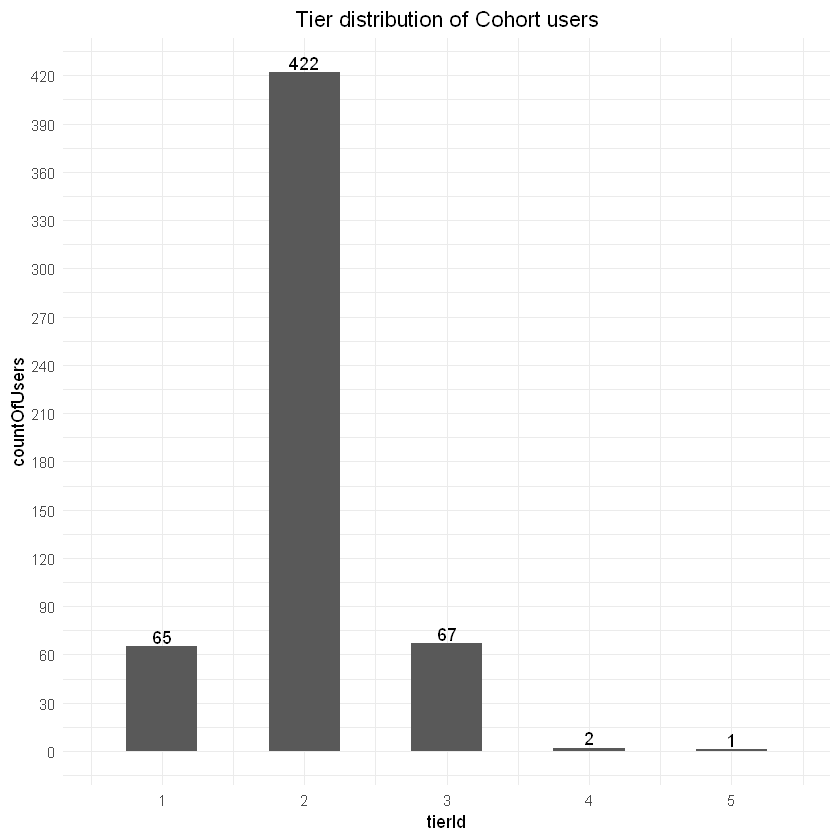

In [24]:
# plot: tier distribution of cohort users
tier_dist_cohort_users_plot

# Table: tier distribution of cohort users
tier_dist_cohort_users


&nbsp;

<hr>

**Q6(Part-2):** What the gender distribution of Cohort users?

&nbsp;


In [25]:
# making sure that we are only using users that satisfy cohort definition
gender_dist_cohort_users <- customer_user_raw %>%
  filter(customerId %in% cohort_customers) 

# removing duplicate rows (if any)
gender_dist_cohort_users <- gender_dist_cohort_users[!duplicated(gender_dist_cohort_users), ]

# grouping and summarising by gender
gender_dist_cohort_users <- gender_dist_cohort_users %>%
  group_by(gender) %>%
  summarise(countOfUsers = n()) %>%
  mutate(percentOfUsers = (countOfUsers/sum(countOfUsers, na.rm = TRUE))*100)

# plot: gender distribution of cohort users
gender_dist_cohort_users_plot <-  gender_dist_cohort_users %>%
  ggplot(mapping = aes(x = gender, y = countOfUsers)) +
  geom_col(width = 0.5) +
  scale_y_continuous(breaks = seq(0, 500, by = 30)) +
  geom_text(mapping = aes(label = countOfUsers), position=position_dodge(width=0.9), vjust=-0.25) + ggtitle("Gender distribution of Cohort users") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))


&nbsp;

<hr>

**Answer: Q6(Part-2):** Below is a table and a bar graph of of the gender distribution of cohort users.

* Please note: In this cohort, of the total `length(cohort_customers)` = **557** users, there are `nrow(customer_user_raw %>% filter(customerId %in% cohort_customers, gender == "NULL"))` = **11** users whose value for gender column is "NULL" in the dataset. Also, there are `nrow(customer_user_raw %>% filter(customerId %in% cohort_customers, is.na(gender)))`= **80** users whose value for the gender column is "NA". In the gender distribution below (both in table and in graph), I have kept them, instead of filtering them out, as it is good to have a visual representation of these missing values.

&nbsp;


gender,countOfUsers,percentOfUsers
NA,80,14.362657
female,134,24.057451
male,332,59.605027
NULL,11,1.974865


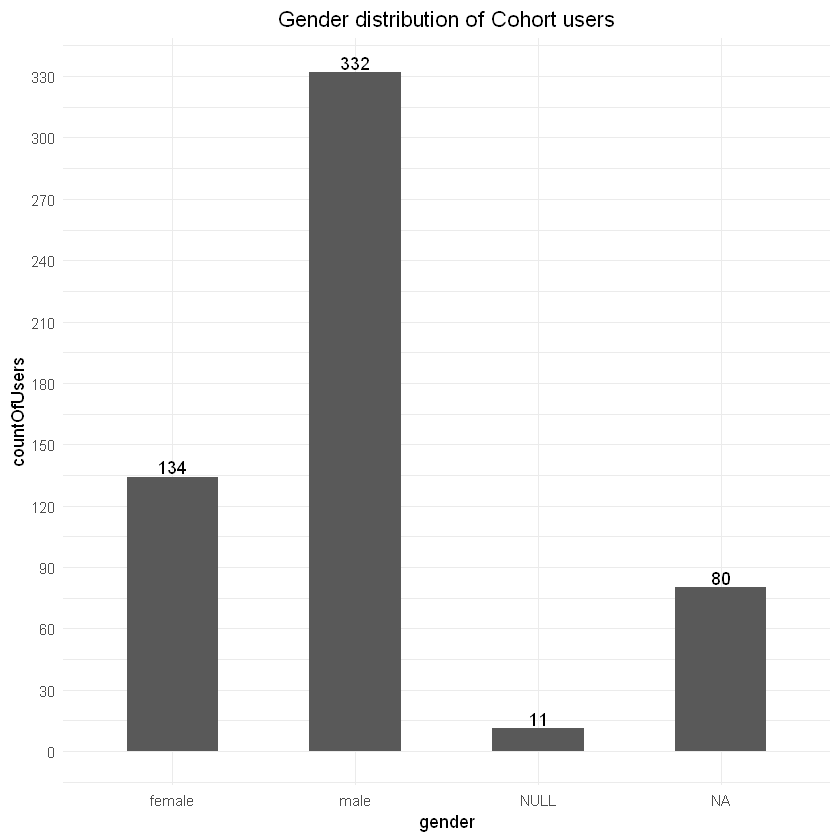

In [27]:
# plot: gender distribution of cohort users
gender_dist_cohort_users_plot

# table: gender distribution of cohort users
gender_dist_cohort_users


&nbsp;

<hr>

**Q6(Part-3):** Which 5 stores have these users scanned the most from?

&nbsp;


In [28]:
# making sure that we are only using users that satisfy cohort definition
cohort_users_5_stores_scanned_most_from <- customer_scans_raw %>% 
  filter(customerId %in% cohort_customers) 

# removing duplicate rows (if any)
cohort_users_5_stores_scanned_most_from <- cohort_users_5_stores_scanned_most_from[!duplicated(cohort_users_5_stores_scanned_most_from), ]

# grouping and summarising by Store name
cohort_users_5_stores_scanned_most_from <- cohort_users_5_stores_scanned_most_from %>%
  group_by(storeName) %>%
  summarise(scansCount = n()) %>% 
  dplyr::top_n(n = 5) %>%
  mutate(scansPercentage = (scansCount/sum(scansCount, na.rm = TRUE))*100)



# plot: 5 stores the user scanned the most from
cohort_stores_top5_scanned_most_plot <-  
  cohort_users_5_stores_scanned_most_from %>%
  dplyr::arrange(scansCount) %>%
  ggplot(mapping = aes(x = storeName, y = scansCount)) +
  geom_col(width = 0.5) +
  scale_y_continuous(breaks = seq(0, 1800, by = 100)) +
  geom_text(mapping = aes(label = scansCount), position=position_dodge(width=0.9), vjust=-0.25) + ggtitle("5 stores users scanned most from") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))


Selecting by scansCount


&nbsp;

#### **Answer: Q6(Part-3):** Below is a table and a bar graph for the 5 stores from which the cohort users scanned the most.

&nbsp;


storeName,scansCount,scansPercentage
Big Bazaar,1634,52.607856
Latt Liv,355,11.429491
Lifestyle,479,15.421764
Luxe,395,12.717321
Miniso,243,7.823567


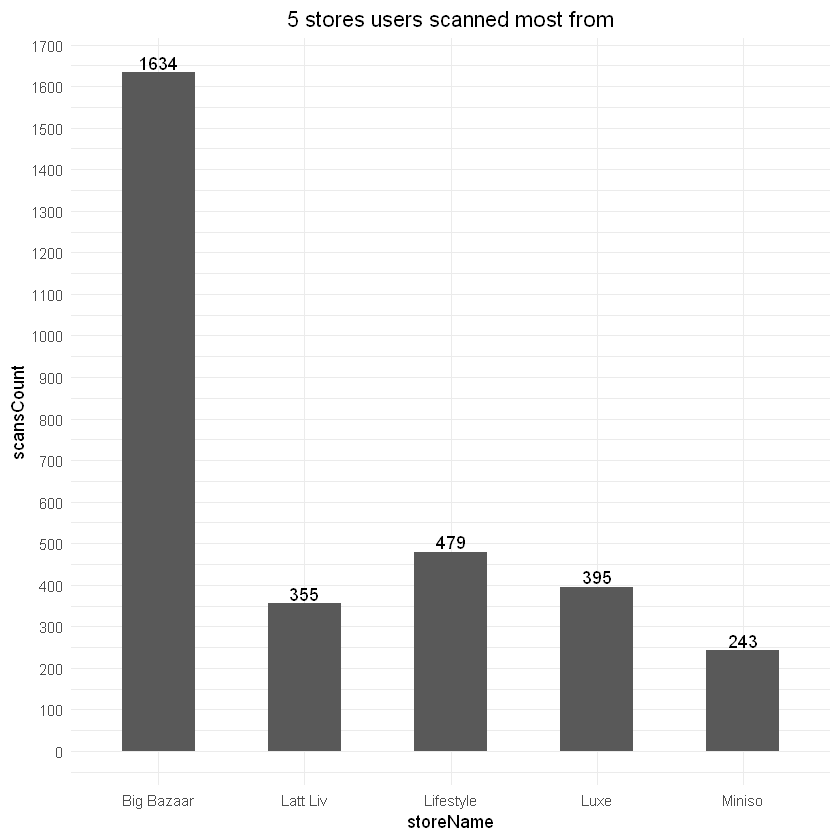

In [29]:
# plot: 5 stores customers scanned most from
cohort_stores_top5_scanned_most_plot

# table: 5 stores customers scanned most from
cohort_users_5_stores_scanned_most_from


&nbsp;

<hr>

#### **Q6(Part-4):** Which source has the most users coming from in this cohort?

&nbsp;


In [30]:
# making sure that we are only using users that satisfy cohort definition
cohort_source_users <- customer_user_raw %>% 
  filter(customerId %in% cohort_customers)

# removing duplicate rows (if any)
cohort_source_users <- cohort_source_users[!duplicated(cohort_source_users), ]

# grouping and summarizing by "source" column
cohort_source_users <- cohort_source_users %>%
  group_by(source) %>%
  summarise(userCount = n()) %>%
  mutate(userPercentage = (userCount/sum(userCount, na.rm = TRUE))*100)

# Answer table for Q6 Part 4: Which source has the most users coming from?
cohort_source_most_users_table <- cohort_source_users %>%
  dplyr::top_n(n = 5)

# plot: Top 5 sources from which most users are coming
cohort_source_most_users_table_plot <-  
  cohort_source_most_users_table %>%
  dplyr::arrange(userCount) %>%
  ggplot(mapping = aes(x = source, y = userCount)) +
  geom_col(width = 0.5) +
  scale_y_continuous(breaks = seq(0, 1800, by = 100)) +
  geom_text(mapping = aes(label = userCount), position=position_dodge(width=0.9), vjust=-0.25) + ggtitle("Top 5 sources from which most users are coming") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))


Selecting by userPercentage


In [31]:
# values for important variables (run these to get a better sense of the code)
filter(cohort_source_most_users_table, is.na(source))$userCount
filter(cohort_source_most_users_table, source == "NULL")$userCount
cohort_source_most_users_table$source[3]
cohort_source_most_users_table$userCount[3]
cohort_source_most_users_table$source[3]
cohort_source_most_users_table$source[3]
cohort_source_most_users_table$userCount[3]

[1] 433

[1] 27

[1] "NPBPROMO3"

[1] 12

[1] "NPBPROMO3"

[1] "NPBPROMO3"

[1] 12

&nbsp;

**Answer: Q6(Part-4):** 

* Below is a table and a bar graph for the top 5 sources from which most of the users are coming in this cohort. 

* The question asks to list the top source from which most users are coming. As is clear from the bar graph below, most of the source information is missing (NA, NULL).

* Instead of removing them from the plot, I have kept these intentionally as I always find it useful to have a visual representation of what is missing from the dataset. Otherwise, many times, it simply gets missed from analysis.

* But, if we ignore the `filter(cohort_source_most_users_table, is.na(source))$userCount` = **433** NA values, and `r filter(cohort_source_most_users_table, source == "NULL")$userCount` = **27** NULL values, the source from which the highest number of users are coming is `cohort_source_most_users_table$source[3]` = **NPBPROMO3**, with total number of users = `r cohort_source_most_users_table$userCount[3]` = **12**.

* So, the answer for Question 6(part-4) is: `r cohort_source_most_users_table$source[3]` = **NPBPROMO3** is the source from which `r cohort_source_most_users_table$userCount[3]` = **12** users are coming.

&nbsp;


source,userCount,userPercentage
NA,433,77.737882
NPBPROMO1,8,1.436266
NPBPROMO3,12,2.154399
NPBPROMO4,8,1.436266
NULL,27,4.847397


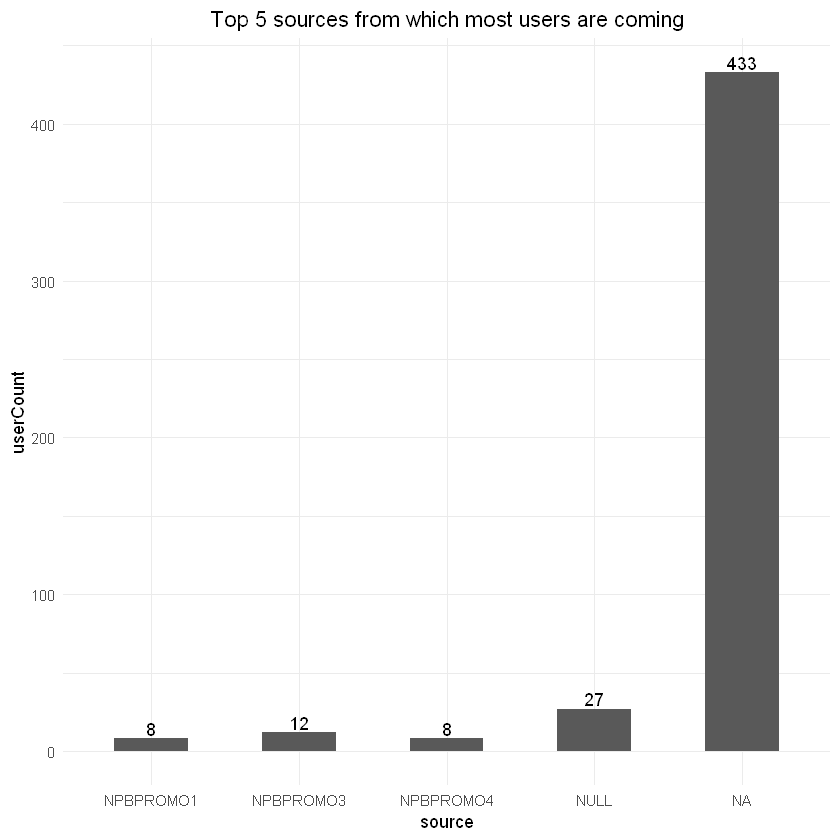

In [32]:
# plot: Top 5 sources from which most users are coming
cohort_source_most_users_table_plot

# table: Top 5 sources from which most users are coming
cohort_source_most_users_table


&nbsp;

<hr>

#### A few other graphs to help better understand Q6:

&nbsp;


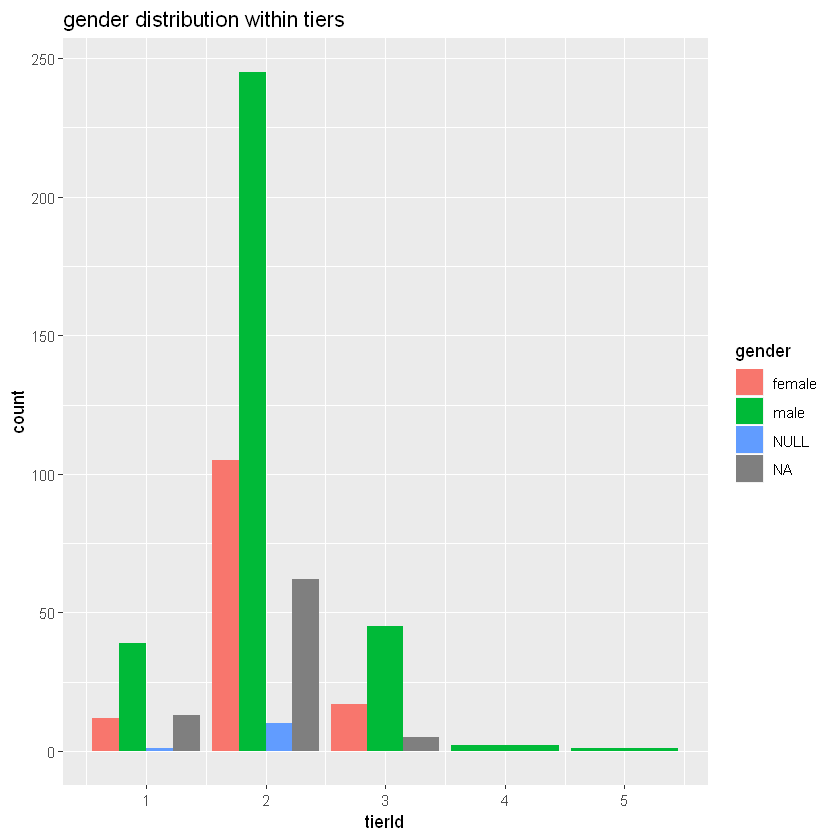

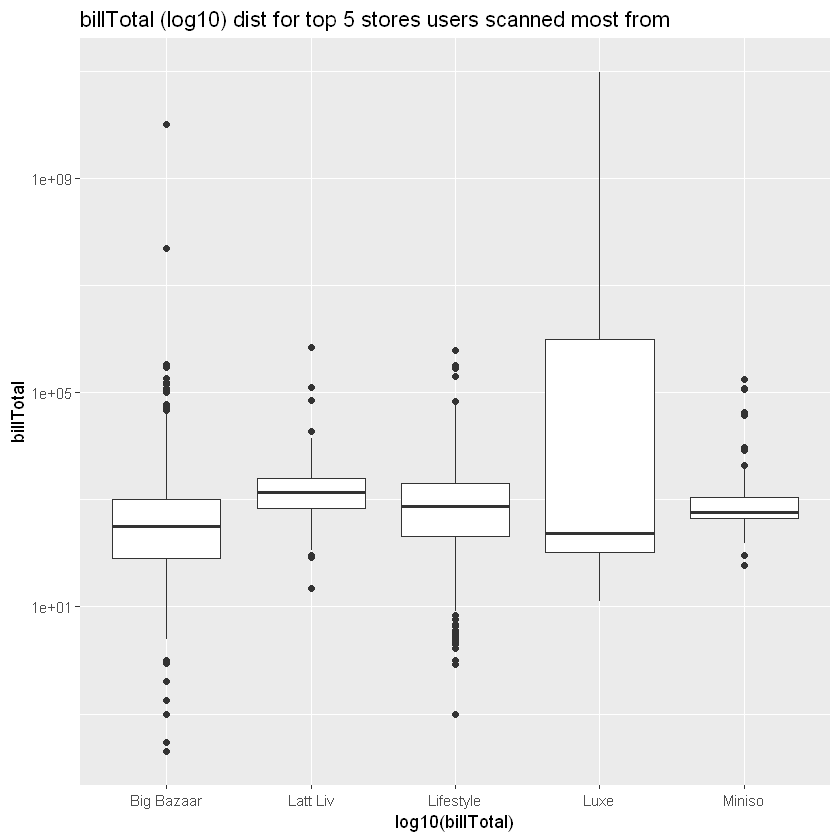

In [33]:
# tmp dataset for generating graphs
foo_user_tmp <- customer_user_raw %>%
  filter(customerId %in% cohort_customers)

foo_scans_tmp <- customer_scans_raw %>%
  filter(customerId %in% cohort_customers,
         storeName %in% cohort_users_5_stores_scanned_most_from$storeName)


# gender distribution within tiers
foo_user_tmp %>% 
  ggplot(mapping = aes(x = tierId, fill = gender)) +
  geom_bar(position = "dodge") + 
  ggtitle("gender distribution within tiers")

# billTotal distribution for top 5 stores users scanned most from
foo_scans_tmp %>% 
  ggplot(mapping = aes(x = storeName, y = billTotal)) +
  scale_y_log10() +
  geom_boxplot() + 
  xlab("log10(billTotal)") +
  ggtitle("billTotal (log10) dist for top 5 stores users scanned most from")

  


&nbsp;

<hr>

#### **Q6(Part-5):** Observe the behaviour of this cohort and write your observations and insights.

&nbsp;

#### **Answer: Q6(Part-5):** Observations and Insights:

* In this cohort, more than 75% of the total number of users live in tier-2 alone. 86% of the users live in tier-1 and tier-2 combined. 98% of the users live in tier-1, tier-2 and tier-3 combined. Almost no one lives in Tier-4 and Tier-5. This shows that this particular cohort mostly resides in Urban high population centers. **[Refer plot: Tier distribution of Cohort users plot]**.

* Around 70% of the users in this cohort are Males and 30% females. But, almost 15% of data on 'gender' is missing (either NA, or NULL). **[Refer plot: Gender distribution of cohort users plot]**.
  
  * The sex ratio for India according to [this article](https://www.census2011.co.in/sexratio.php) is 1.06 males for every 1 female. This means that for every 1000 females there are 1060 males. 
  
    * The sex ratio in our cohort (with missing gender data) is 2.47 males for 1 female, which would mean that for every 1000 females, there are 2,470 males. That does not seem right. Gender gap will probably decrease if missing data becomes available.
  
* Almost all of the missing data, comes from either tier-1, tier-2 or tier-3. This makes sense as that is where most of the users reside. **[Refer plot: Gender distribution within tiers plot]**

* Gender gap within tiers is similar to the gender gap in the  overall data. But, as mentioned earlier, this is probably because a lot of data on gender is missing. **[Refer plot: Gender distribution within tiers plot]**

* Users scanned the most from Big Bazaar. Of the total number of scans count in the top 5 stores (from which users scanned the most), more than half of those scans are for Big Bazaar. The next big chunk is taken by the Lifestyle store, followed by Luxe, Latt Liv and Miniso. **[Refer plot: 5 stores users scanned most from plot]**

* Big Bazaar and Lifestyle probably being the most pocket friendly, were the ones that users scanned the most. But, for more expensive (relatively) stores like Luxe, Miniso, Latt Liv we see lesser number of scans (compared to Big Bazaar). **[Ref plot: 5 stores users scanned most from plot]**

* The source from which most users are coming is NPBPROMO3, the next best top sources also are versions of this NPBPROMO class. This means that these are probably the best places for shop owners to invest their money in to attract customers.**[Refer plot: Top 5 sources from which most users are coming]**

* **[Refer plot: billTotal distribution for top 5 stores users scanned most from]**
 
  * We see that average values for billTotal for all stores is approximately the same. For big bazaar the average is the lowest, which is expected.
  
  * There is a high amount of variation in the distribution of billTotal for both Big Bazaar and Lifestyle. This is probably because of the variety of products they sell. That also explains the most number of bills being scanned in these stores, as they attract people from all tiers.
  
  * Their is very little amount of variation in the billTotal of Miniso store, which probably hints at the streamlined product lines that it has for people who can afford to spend more, probably mostly tier-1 and tier-2 people.
  
  * In all stores, except Luxe, there is small amount if variation around the average, or in other words, the Inter Quartile Range is small. This tells us that, except for Luxe (which has a large amount of variation in its billTotal), all other stores have billTotals that stay close to the average billTotal amount.


&nbsp;

&nbsp;

<hr>

### Code and answer for Q7

**Question 7:** Month on Month comparison:

  1. From the given tables derive this table(execute joins with other  tables if required).
  
  2. Analyse the change in September Vs October and highlight/mention the highest changes for each tier
  
  3. Observe the metrics and write your observations and insights
  
&nbsp;

**Code and Answer to Question 7: Part-1**

**Q7(Part-1):** From the given tables derive this table(execute joins with other tables if required)

#### Code


In [34]:
# sanity checks
sum(customer_scans_raw$customerId %in%
  customer_user_raw$customerId) == length(customer_scans_raw$customerId)

sum(customer_user_raw$customerId %in%
  customer_scans_raw$customerId)

# performing a left-join and combining the "customer_user_raw" data with "customer_scans_raw data" 

customer_user_scans_join_Q7 <- dplyr::left_join(
  select(customer_user_raw, -createdAt), customer_scans_raw, by = "customerId")

# removing duplicate rows (if any) unlikely that we will see duplicate rows here as there are a lot of columns
customer_user_scans_join_Q7 <- customer_user_scans_join_Q7[!duplicated(customer_user_scans_join_Q7), ]

# adding 2 columns, a month and a year column to the customer_user_scans_join_Q7 dataset------------------------------------------------------------------------ 

# we will derive these column is derived from the "createdAt" column of the joined dataset. The "createdAt" column in the joined dataset, contains the date at which the scan was created.

# Note that, there was a "createdAt" column in the customer_user_raw dataset, # although the name is the same, that refers to the date at which the customer signed up. To avoid confusion, I removed that column, while joining rhe dataset. 
# So, the "createdAt" in the joined dataset, corresponds to the "createdAt" column of the "customer_scans_raw" data. It should be interpreted as, it would have been interpreted in the scans dataset, i.e. it is the date at which the scan was created.

# From this column, I will derive two new columns and add it to the joined data set before.

customer_user_scans_join_Q7 <- customer_user_scans_join_Q7 %>%
  mutate(scanCreatedMonth = lubridate::month(createdAt), 
         scanCreatedYear = lubridate::year(createdAt))

# left_join customer_user_scans_join_Q7 dataset with coupon_transactions_raw_unique--------------------------------------

# sanity checks before joining

sum(coupon_transactions_raw_unique$customerId %in% 
  customer_user_scans_join_Q7$customerId)

sum(customer_user_scans_join_Q7$customerId %in% coupon_transactions_raw_unique$customerId)

# left-joining after sanity check complete
customer_user_scans_join_Q7_join_coupTransRawUniq <- 
  left_join(customer_user_scans_join_Q7, coupon_transactions_raw_unique, 
            by = "customerId")



# Create parts of table separately and then bind them together------------------------------------------------------------

# Unique users (by TierId) who scanned in Sep 2020-----------------------

# selecting relevant columns
uniq_users_byTier_scanned_Sep2020 <- customer_user_scans_join_Q7 %>% 
  select(customerId, tierId, scanCreatedMonth, scanCreatedYear, createdAt)

# removing duplicates
uniq_users_byTier_scanned_Sep2020 <- uniq_users_byTier_scanned_Sep2020[!duplicated(uniq_users_byTier_scanned_Sep2020), ]

# uniq users by tier who scanned in sep 2020 summary table
uniq_users_byTier_scanned_Sep2020 <- uniq_users_byTier_scanned_Sep2020 %>%
  filter(scanCreatedMonth %in% c(9), scanCreatedYear %in% c(2020), !is.na(createdAt)) %>%
  group_by(tierId) %>%
  summarise(uniqUsersWhoScannedIn_Sep2020 = length(unique(customerId)))

# adding a row for tier-5 and filling it with NA as there is no data in tier-5
uniq_users_byTier_scanned_Sep2020 <- dplyr::add_row(
  uniq_users_byTier_scanned_Sep2020, tierId = 5, uniqUsersWhoScannedIn_Sep2020 = NA)


# Unique users (by tierId) who scanned in Oct 2020-----------------------------------

# selecting relevant columns
uniq_users_byTier_scanned_Oct2020 <- customer_user_scans_join_Q7 %>% 
  select(customerId, tierId, scanCreatedMonth, scanCreatedYear, createdAt)

# removing duplicates
uniq_users_byTier_scanned_Oct2020 <- uniq_users_byTier_scanned_Oct2020[!duplicated(uniq_users_byTier_scanned_Oct2020), ]

# Unique users (by tierId) who scanned in Oct 2020 summary table
uniq_users_byTier_scanned_Oct2020 <- uniq_users_byTier_scanned_Oct2020 %>%
  filter(scanCreatedMonth %in% c(10), scanCreatedYear %in% c(2020), !is.na(createdAt)) %>%
  group_by(tierId) %>%
  summarise(uniqUsersWhoScannedIn_Oct2020 = length(unique(customerId)))


# Number of bills scanned (Image) in Sep 2020---------------------------------------

# selecting relevant columns
num_bills_scanned_Sep2020_byTier <- customer_user_scans_join_Q7 %>%
  select(tierId, customerId, scanCreatedMonth, scanCreatedYear, image)

# removing duplicates
num_bills_scanned_Sep2020_byTier <- num_bills_scanned_Sep2020_byTier[!duplicated(num_bills_scanned_Sep2020_byTier), ]

# Number of bills scanned (Image) in Sep 2020 summary table
num_bills_scanned_Sep2020_byTier <-  num_bills_scanned_Sep2020_byTier %>%
  filter(scanCreatedMonth %in% c(9), scanCreatedYear %in% c(2020), !is.na(image)) %>%
  group_by(tierId) %>%
  summarise(numBillsScannedIn_Sep2020 = length(image))

# adding a row for tier-5 and filling it with NA as there is no data in tier-5
num_bills_scanned_Sep2020_byTier <- dplyr::add_row(num_bills_scanned_Sep2020_byTier, 
                tierId = 5, numBillsScannedIn_Sep2020 = NA)


# Number of bills scanned (Image) in Oct 2020-------------------------------------------

# selecting relevant columns
num_bills_scanned_Oct2020_byTier <- customer_user_scans_join_Q7 %>%
  select(tierId, customerId, scanCreatedMonth, scanCreatedYear, image)

# removing duplicates
num_bills_scanned_Oct2020_byTier <- num_bills_scanned_Oct2020_byTier[!duplicated(num_bills_scanned_Oct2020_byTier), ]

# Number of bills scanned (Image) in Oct 2020 summary table
num_bills_scanned_Oct2020_byTier <-  num_bills_scanned_Oct2020_byTier %>%
  filter(scanCreatedMonth %in% c(10), scanCreatedYear %in% c(2020), !is.na(image)) %>%
  group_by(tierId) %>%
  summarise(numBillsScannedIn_Oct2020 = length(image))

# Scan Amount (billTotal) Sep 2020------------------------------------------------------

# selecting relevant columns
scan_amount_bill_total_Sep2020_byTier <- customer_user_scans_join_Q7 %>% 
  select(customerId, tierId, scanCreatedMonth, scanCreatedYear, billTotal)

# removing duplicates  
scan_amount_bill_total_Sep2020_byTier <- scan_amount_bill_total_Sep2020_byTier[!duplicated(scan_amount_bill_total_Sep2020_byTier), ]

# Scan Amount (billTotal) Sep 2020 summary table
scan_amount_bill_total_Sep2020_byTier <- 
  scan_amount_bill_total_Sep2020_byTier %>%
  filter(scanCreatedMonth %in% c(9), scanCreatedYear %in% c(2020)) %>%
  group_by(tierId) %>%
  summarise(scanAmountBillTotal_Sep2020 = sum(billTotal, na.rm = TRUE))

# adding a row for tier-5 and filling it with NA as there is no data in tier-5
scan_amount_bill_total_Sep2020_byTier <- dplyr::add_row(
  scan_amount_bill_total_Sep2020_byTier, tierId = 5, 
  scanAmountBillTotal_Sep2020 = NA
)

# Scan Amount (billTotal) October 2020--------------------------------------------

# selecting relevant columns
scan_amount_bill_total_Oct2020_byTier <- customer_user_scans_join_Q7 %>% 
  select(customerId, tierId, scanCreatedMonth, scanCreatedYear, billTotal)

# removing duplicates  
scan_amount_bill_total_Oct2020_byTier <- scan_amount_bill_total_Oct2020_byTier[!duplicated(scan_amount_bill_total_Oct2020_byTier), ]

# Scan Amount (billTotal) October 2020 summary table
scan_amount_bill_total_Oct2020_byTier <- 
  scan_amount_bill_total_Oct2020_byTier %>%
  filter(scanCreatedMonth %in% c(10), scanCreatedYear %in% c(2020)) %>%
  group_by(tierId) %>%
  summarise(scanAmountBillTotal_Oct2020 = sum(billTotal, na.rm = TRUE))

# Coupon Unlocks in September 2020-----------------------------------------------------

# selecting relevant columns
coupon_unlocks_sep2020_byTier <- customer_user_scans_join_Q7_join_coupTransRawUniq %>%
  select(customerId, tierId, scanCreatedMonth, scanCreatedYear, couponId, 
         couponUnlockDate) 

# removing duplicates 
coupon_unlocks_sep2020_byTier <- coupon_unlocks_sep2020_byTier[!duplicated(coupon_unlocks_sep2020_byTier), ]

# Coupon Unlocks in September 2020 summary table
coupon_unlocks_sep2020_byTier <-  coupon_unlocks_sep2020_byTier  %>%
  filter(scanCreatedMonth %in% c(9), scanCreatedYear %in% c(2020)) %>%
  group_by(tierId) %>%
  summarise(couponUnlocks_Sep2020 = sum(!is.na(couponUnlockDate)))

# adding a row for tier-5 and filling it with NA as there is no data in tier-5
coupon_unlocks_sep2020_byTier <- dplyr::add_row(coupon_unlocks_sep2020_byTier, tierId = 5, couponUnlocks_Sep2020 = NA)


# Coupon Unlocks in October 2020-----------------------------------------------------------

# selecting relevant columns
coupon_unlocks_Oct2020_byTier <- customer_user_scans_join_Q7_join_coupTransRawUniq %>%
  select(customerId, tierId, scanCreatedMonth, scanCreatedYear, couponId, 
         couponUnlockDate) 

# removing duplicate rows
coupon_unlocks_Oct2020_byTier <- coupon_unlocks_Oct2020_byTier[!duplicated(coupon_unlocks_Oct2020_byTier), ]

# Coupon Unlocks in October 2020 summary table
coupon_unlocks_Oct2020_byTier <-  coupon_unlocks_Oct2020_byTier %>%
  filter(scanCreatedMonth %in% c(10), scanCreatedYear %in% c(2020)) %>%
  group_by(tierId) %>%
  summarise(couponUnlocks_Oct2020 = sum(!is.na(couponUnlockDate)))

# All sub-parts of table created. Now, joining all the sub-parts of the table into a single dataset, in a format as asked in Q7 Part 1---------------------

monthOnMonthCompTableQ7P1 <- left_join(left_join(left_join(left_join(left_join(left_join(left_join(uniq_users_byTier_scanned_Sep2020, 
          uniq_users_byTier_scanned_Oct2020, by = "tierId"),
          num_bills_scanned_Sep2020_byTier, by = "tierId"), 
          num_bills_scanned_Oct2020_byTier, by = "tierId"), 
          scan_amount_bill_total_Sep2020_byTier, by = "tierId"), 
          scan_amount_bill_total_Oct2020_byTier, by = "tierId"), 
          coupon_unlocks_sep2020_byTier, by = "tierId"), 
          coupon_unlocks_Oct2020_byTier, by = "tierId")


[1] TRUE

[1] 5543

[1] 26597

[1] 28883

&nbsp;

#### Important Note for interpreting the above code chunk: 

* There is a "createdAt" column both in the customer_user_raw dataset and customer_scans_raw dataset. The name is the same, but they mean different things. In the customer_user_raw dataset, the "createdAt" column refers to the **date at which the customer signed up**. 

* In the customer_scans_raw dataset, the "createdAt" column refers to *the date at which the scanned bill was created*.  

* To avoid confusion, after joining the customer_user_raw and customer_scans_raw dataset, I removed one of the "createdAt" column (one that comes from the customer_user_raw dataset and refers to the date of sign up).

* So, the "createdAt" in the **customer_user_scans_join_Q7** dataset, corresponds to the "createdAt" column of the "customer_scans_raw" data. It should be interpreted as, it would have been interpreted in the scans dataset, i.e. it is the date at which the scan was created.

* I also join the above (**customer_user_scans_join_Q7**) dataset with the **coupon_transactions_raw_unique** dataset. In the resulting dataset, called: **customer_user_scans_join_Q7_join_coupTransRawUniq**,  again, the "createdAt" column should be interpreted as: the date at which the scan was created.

* The final table is generated by joining each subset table (8 subset tables in total). This is why we see a bunch a lot of left_joins in the end of the above code chunk.

* Also, please note that 5th tier was not present in any of the September, 2020 subset tables, so before joining the subset tables, I added an additional (5th) row at the end of the dataset for the 5th tier (with its value being NA) for all September 2020 subset tables. 

&nbsp;

#### **Answer: Q7(Part-1):** Below present is the month on month comparison table in the format as asked in Q7 Part-1 of the assignement.

&nbsp;


In [35]:
monthOnMonthCompTableQ7P1



tierId,uniqUsersWhoScannedIn_Sep2020,uniqUsersWhoScannedIn_Oct2020,numBillsScannedIn_Sep2020,numBillsScannedIn_Oct2020,scanAmountBillTotal_Sep2020,scanAmountBillTotal_Oct2020,couponUnlocks_Sep2020,couponUnlocks_Oct2020
1,191,148,339,257,598540.5,396168.50,216,151
2,341,351,935,850,6556099.6,6202495.15,1214,1084
3,42,58,190,287,2388393.8,3829408.42,842,753
4,1,2,1,21,275.0,59334.17,28,30
5,NA,1,NA,14,NA,640214.90,NA,23


&nbsp;

**Q7 Part-1 Graphs:** Generating a few graphs to get insight into the month-on-month comparison table genrated above. After this I will answer Q7: parts 2 and 3.


Parsed with column specification:
cols(
  tierId = col_double(),
  trait = col_character(),
  monthYear = col_character(),
  values = col_double()
)


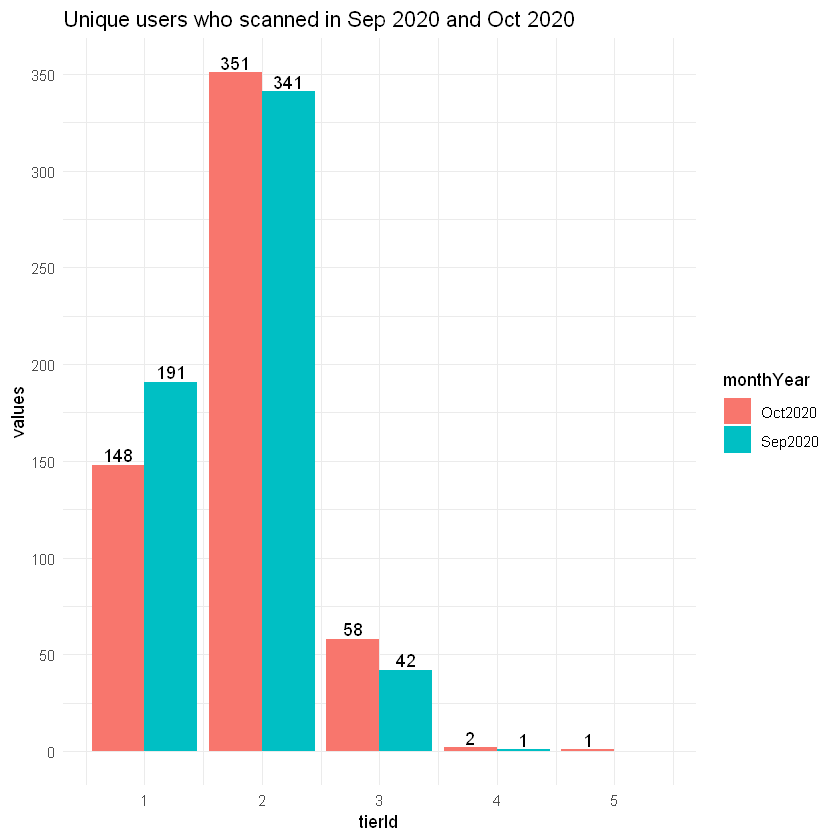

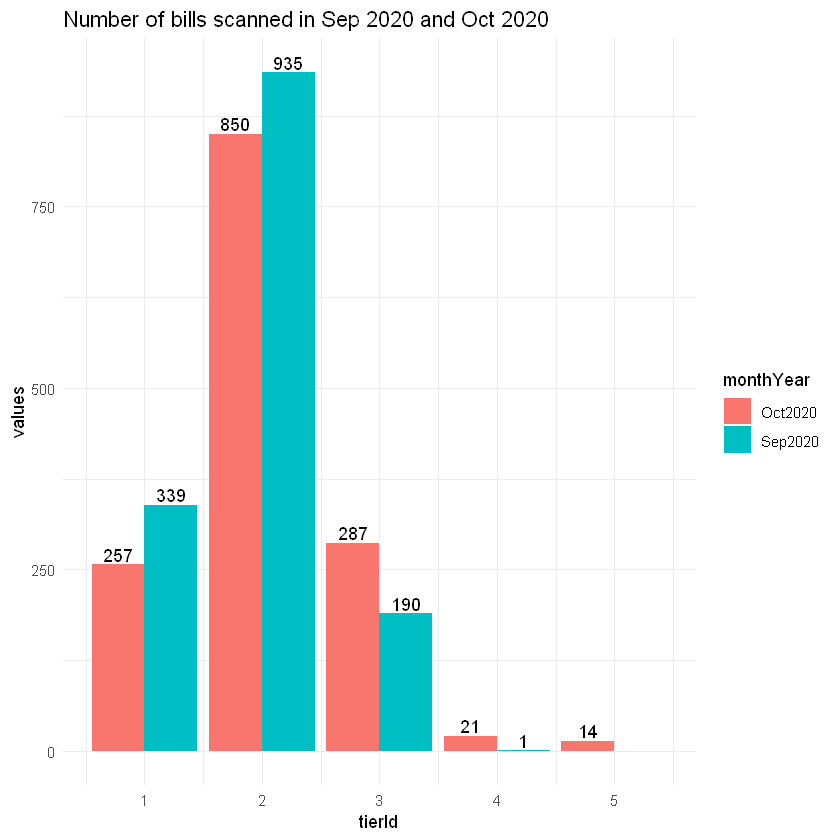

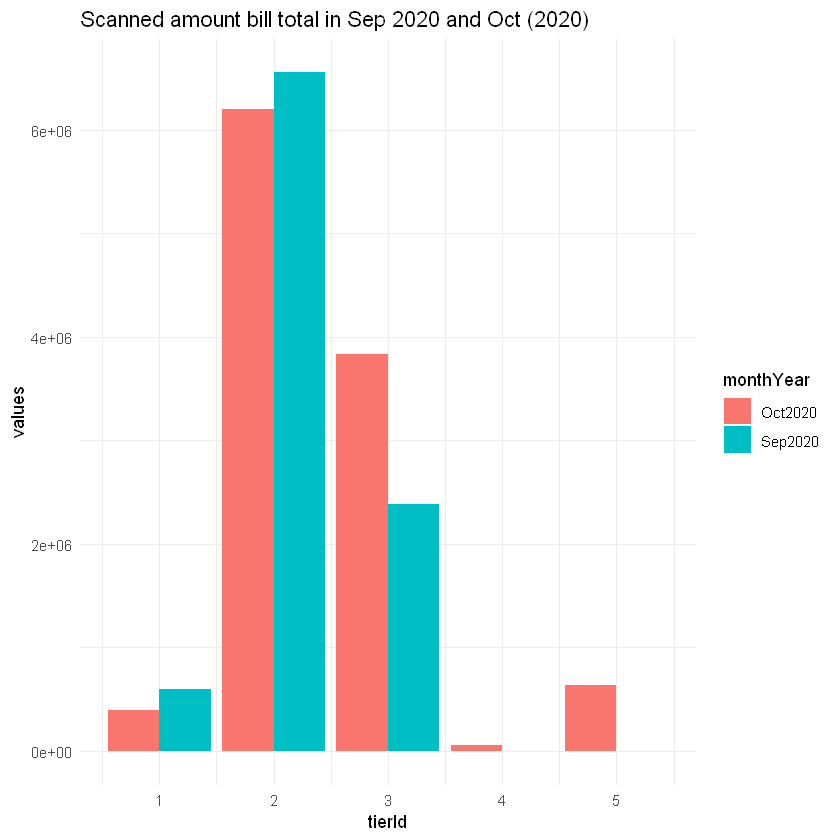

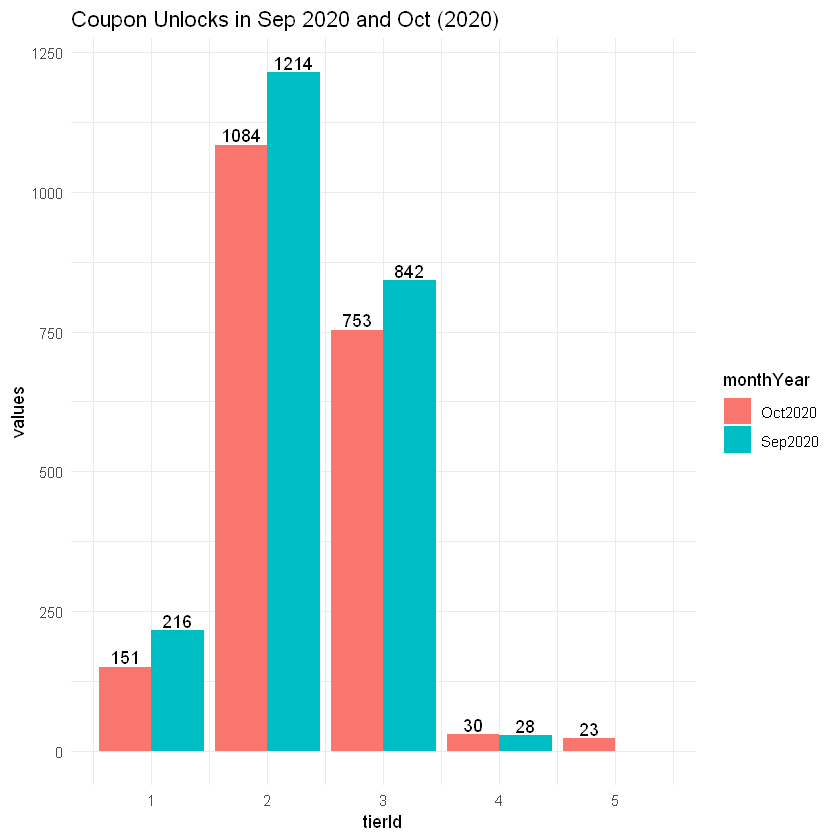

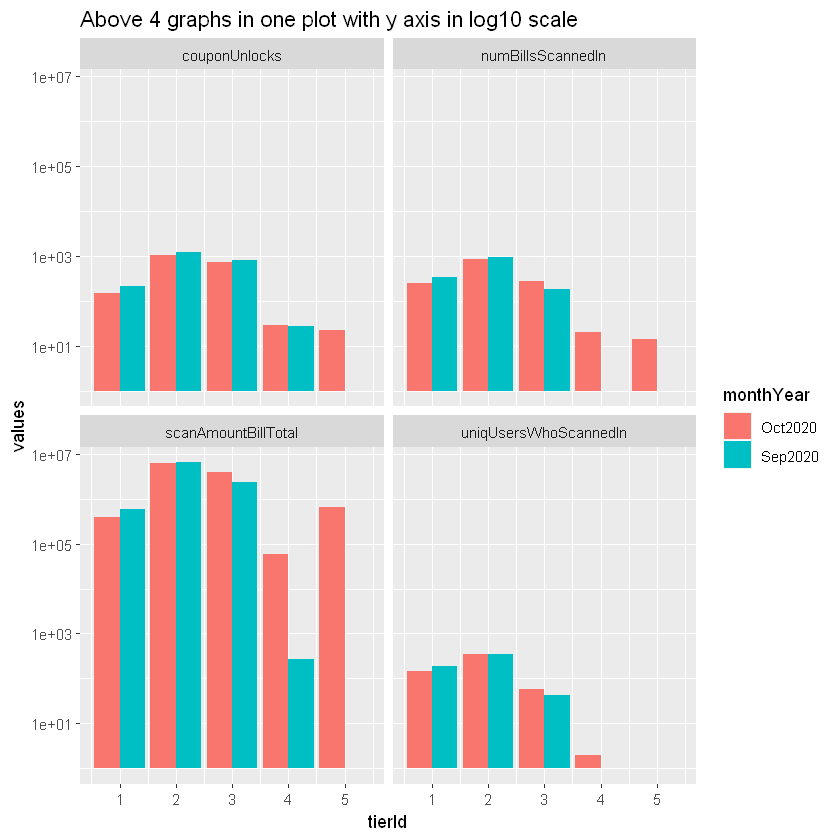

In [36]:
# bringing the data into a tidy format to make plots with ggplot2
monthOnMonthCompTableQ7P1_tidyFormat <- read_csv(url("https://raw.githubusercontent.com/AarshBatra/UnifyndInterviewAssessment/master/data-raw/monthOnMonthCompTableQ7P1_tidyFormat.csv"))

# Graph 1: Comparing total unique users who scanned in Sep v/s Oct (2020)
monthOnMonthCompTableQ7P1_tidyFormat %>% 
  filter(trait == "uniqUsersWhoScannedIn") %>%
  ggplot(mapping = aes(x = tierId, y = values, fill = monthYear)) +
  geom_col(position = "dodge") + 
  scale_y_continuous(breaks = seq(0, 500, by = 50)) +
  ggtitle("Unique users who scanned in Sep 2020 and Oct 2020") +
  geom_text(mapping = aes(label = values), position=position_dodge(width=0.9), vjust=-0.25) +
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme_minimal()


# Graph 2: Comparing number of bills scanned in Sep v/s Oct (2020)
monthOnMonthCompTableQ7P1_tidyFormat %>% 
  filter(trait == "numBillsScannedIn") %>%
  ggplot(mapping = aes(x = tierId, y = values, fill = monthYear)) +
  geom_col(position = "dodge") + 
  ggtitle("Number of bills scanned in Sep 2020 and Oct 2020") +
  geom_text(mapping = aes(label = values), position=position_dodge(width=0.9), vjust=-0.25) +
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme_minimal()


# Graph 3: Comparing: Scanned amount bill total in Sep v/s Oct 2020

monthOnMonthCompTableQ7P1_tidyFormat %>% 
  filter(trait == "scanAmountBillTotal") %>%
  ggplot(mapping = aes(x = tierId, y = values, fill = monthYear)) +
  geom_col(position = "dodge") + 
  ggtitle("Scanned amount bill total in Sep 2020 and Oct (2020)") +
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme_minimal()


# Graph 4: Comparing Coupon Unlocks in Sep v/s Oct (2020)

monthOnMonthCompTableQ7P1_tidyFormat %>% 
  filter(trait == "couponUnlocks") %>%
  ggplot(mapping = aes(x = tierId, y = values, fill = monthYear)) +
  geom_col(position = "dodge") + 
  ggtitle("Coupon Unlocks in Sep 2020 and Oct (2020)") +
  geom_text(mapping = aes(label = values), position=position_dodge(width=0.9), vjust=-0.25) +
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme_minimal()

# Graph 5: A facetted bar plot to see all of the above in one graph (but y axis will be in log10 scale, as values for each group differ a lot)

monthOnMonthCompTableQ7P1_tidyFormat %>%
  ggplot(mapping = aes(x = tierId, y = values, fill = monthYear)) +
  geom_col(position = "dodge") + 
  scale_y_log10()+
  facet_wrap(~ trait) +
  ggtitle("Above 4 graphs in one plot with y axis in log10 scale")


&nbsp;

**Note:** In the final graph above with title **Above 4 graphs in one plot with y axis in log10 scale**, the y axis is in **log10** scale. For the 4 groups in the plot, range of values differs by a lot, hence y axis is log scaled, so as to display all 4 groups together in one single plot, which makes comparison easier.

&nbsp;

<hr>

**Q7(Part-2):** Analyse the change in September Vs October and highlight/mention the highest changes for each tier

&nbsp;


In [37]:
# adding 4 (difference columns) to monthOnMonthTableQ7P1 and creating a new dataset
# with only those columns and the tierId

monthOnMonthDifferenceCompQ7Part2 <-  monthOnMonthCompTableQ7P1 %>%
  mutate(diff_unq_users_scan_oct2020_sep2020 = (uniqUsersWhoScannedIn_Oct2020 - uniqUsersWhoScannedIn_Sep2020), 
         diff_num_bills_scanned_oct2020_sep2020 = 
           (numBillsScannedIn_Oct2020 - numBillsScannedIn_Sep2020), 
         diff_scan_amt_billTotal_oct2020_sep2020 = 
           (scanAmountBillTotal_Oct2020 - scanAmountBillTotal_Sep2020), 
         diff_couponUnlocks_oct2020_sep2020 = 
           (couponUnlocks_Oct2020 - couponUnlocks_Sep2020)) %>%
  select("tierId", starts_with("diff"))

monthOnMonthDifferenceCompQ7Part2


tierId,diff_unq_users_scan_oct2020_sep2020,diff_num_bills_scanned_oct2020_sep2020,diff_scan_amt_billTotal_oct2020_sep2020,diff_couponUnlocks_oct2020_sep2020
1,-43,-82,-202371.97,-65
2,10,-85,-353604.46,-130
3,16,97,1441014.65,-89
4,1,20,59059.17,2
5,NA,NA,NA,NA


&nbsp;

#### **Answer: Q7(Part-2): This also contains  many observations that will count towards the answer of Q7(Part-3).** 

* In addition to the above graphs, below present is a  table that summarizes the same information (as in the above graphs), but in form of differences (October 2020 minus September 2020) by tierId. For example: **diff_scan_amt_billTotal_oct2020_sep2020** column contains the following information (for each tier): change(increase is +, decrease is -) in billTotal Amount from Sep 2020 to Oct 2020. 

* **The highest changes for each tier are as follows**:
  
  * First, note that because there is no data available for tier-5 in Sep 2020, we can not comment on how their metrics changed from september to october. Also, this is true in general for the entire dataset, as only 3 rows of data for tier-5 are present. So, when comparing changes (in various attributes of interest) from September 2020 to October 2020, we will focus on tier 1 to 4.
  
  * **[Ref table above and also the plot above named: Unique users who scanned in Sep 2020 and Oct 2020]**: The number of unique users who scanned dropped drastically (-43, a 22% decline from 191) for *tier-1* (from Sep2020 to Oct 2020) relative to the other tiers, which saw small gains (from Sep2020 to Oct2020) in the number of unique users who scanned.
  
  * **[Refer Table above and also the plot above named: Number of bill scanned in Sep 2020 and Oct 2020]**: The total number of bills scanned increased 20 fold (2000%, i.e from 1 to 21) for Tier-4 from September 2020 to October 2020. This was the biggest change in the total number of bills scanned for any given tier. Tier 3 also saw a 51% increase in total number of bills scanned (from 190 in sep 2020 to 287 in occt 2020). For the rest (tier 1 and 2), both saw a decline in the total number of bills scanned, with tier-1(-23%, from 339 to 257) declining almost 3 times more than tier-2(-9% from 935 to 850). 
  
  * **[Refer table above and also the plot above named: Scanned amount in bill total in Sep 2020 and Oct 2020]**: Scanned amount bill total increased (from Sep2020 to Oct2020) the most for Tier-3. This is consistent with point above in which we saw a 51% increase in the number of bills scanned. As, the number of bills scanned increases, so will the scanned amount of the bill. Similarly, as expected the percentage decline in scanned amount bill total for tier-1 is much more (-66%, a decline of ~ -2 Lacs from initial 6 lacs) than tier-2 (-4% ~ -3 lacs, from an intial of 65.5 lacs). Also, as we saw in the above point a 2000% increase in the total number of bills scanned for tier-4 (from sep 2020 to Oct 2020), here similarly we find that the increase in the scanned amount of bill total for tier-4 is a 218 fold increase, from a mere 275 Rs to massive 60K!.
  
  * **[Refer the table above and also the plot above named: Coupons unlocked in Sep 2020 and October 2020]**: For every tier (except tier-4, for which there was a marginal increase of 2 coupons), the coupon unlocks declined from Sep-2020 to October-2020. The decline in the number of coupons in tier-1 was 3 times (-30%, from 216 to 151) compared to tier-1 and tier-2 (both had a decline of 10%).  
   
&nbsp;

<hr>

#### **Answer: Q7(Part-3): Many of the above observations count towards the answer for Q7(Part-3). I will present a few more observations and insights below:**

* Tier-1 saw decline in all the places, given a 22% decline (from sep2020 to oct2020) in its unique users who scanned, there was a decline in all other variables too. For example, the *number of bills scanned* (declined by 23%) and scanned amount in bill total (declined by 66%) is expected as the number of unique users dropped from sep2020 to oct2020. Also, there was a 30 percent decline in coupons unlocked for tier-1, which makes sense as its unique users dropped significantly.

* For tier-2 even though, it saw a increase in the total number of unique users who scanned, the total number of bills scanned and the scanned amount in bill total both suffered a decline. This may be explained by the fact that the increase in the unique users who scanned was only by ~ 3% (from 341 to 351). So, even if assume that these additional 3% did scan, it is quite possible that this is easily offset by the rest of the tier spending/scanning a little less.

* As we noted in Q7 (Part-2), tier-3 saw a signficant increase in the number of bills scanned (and by effect the scanned Amount in Bill total) from September 2020 to October 2020. This increase is in part attributable to a 38% (from 42 to 58) in the number of unique users who scanned in tier-3.

* Also, for tier-4 we see that there was an increase of only 1 unique user who scanned (from Sep2020 to Oct2020), but the number of bills scanned increased by 20 fold (from 1 to 21). As a consequence of this the scanned amount in bill total for tier-4  users saw a 218 fold increase, from a mere Rs 275, to Rs 60,000. Although, remember that because there are only 2 unique users in this group. All of this increased scanning of bills can be largely attributed to the user who joined the list (sometime between sep2020 to oct2020) of unique users who scanned.

* We see a general trend in which tier-3 and above are scanning more and more, but this whole scanning exercise is significantly reduced for tier 1 and tier-2. This may point that tier-1 and tier-2 are not going out much, to buy things. They reside in high population centers, with access to online services for everything (especially in the times of the Coronavirus pandemic, Oct 2020 was a time at which Pandemic was at its peak). The decline in scanning is probably matched by a rise in online shopping, that does not require any buying or scanning.

* But, at the same time, we see a rise in scanning for Tier-3 and Tier-4 users who belong to the suburbs or areas with low population, lack of access to internet, online services, home-delivery, lack of knowledge of using online services etc. Also, it is very likely that these people have much less resources compared to the Tier-1 and Tier-2 users, who can afford to buy much more from the safety of their homes. 

* It is much more likely, that if tier-3 or tier-4 users need to buy something, they need to go out to the store to do so. This may be due to the fact that they do not have access to smartphones/computers. Or, even if they do, they may not know how to use the various apps on their phones that allow for online shopping. Even, if they do know how to do so, they may not want to pay extra for those services, and may prefer local goods, that may be much cheaper.

&nbsp; 

<hr>
* **End of File:** For any questions, please feel free to call me anytime at: 8800592799.
<hr>
